In [124]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
from numpy import genfromtxt
from astropy import units as u
import pickle
from matplotlib import gridspec
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.font_manager import FontProperties
from numpy.random import rand
import pandas as pd
from scipy.optimize import curve_fit

from PyAstronomy.pyTiming import pyPeriod

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


In [2]:
%matplotlib inline

pi = np.pi 

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
print('def: find_nearest(array, value)')

def powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    shifted5=amp5*shift(sinepw,shift5)
    shifted6=amp6*shift(sinepw,shift6)
    shifted7=amp1*shift(sinepw,shift7)
    shifted8=amp2*shift(sinepw,shift8)
    shifted9=amp3*shift(sinepw,shift9)
    shifted10=amp4*shift(sinepw,shift10)
    return shifted1+shifted2+shifted3+shifted4+shifted5+shifted6+shifted7+shifted8+shifted9+shifted10
print('def: powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10)')

def powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    shifted5=amp5*shift(sinepw,shift5)
    shifted6=amp6*shift(sinepw,shift6)
    return shifted1+shifted2+shifted3+shifted4+shifted5+shifted6
print('def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)')

def powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    shifted4=amp4*shift(sinepw,shift4)
    return shifted1+shifted2+shifted3+shifted4
print('def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)')
      
def powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3):
    shifted1=amp1*shift(sinepw,shift1)
    shifted2=amp2*shift(sinepw,shift2)
    shifted3=amp3*shift(sinepw,shift3)
    return shifted1+shifted2+shifted3
print('def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)')
      
def powerfuncsingle(hpp,amp1,shift1):
    shifted1=amp1*shift(sinepw,shift1)
    return shifted1
print('def: powerfuncsingle(hpp,amp1,shift1)')

import os
from os.path import join
array = os.path.abspath('').split('/')
homedir = '/'
for i in range(1,7):
   homedir = join(homedir, array[i])
homedir

def: find_nearest(array, value)
def: powerfunc_ten(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6,amp7,shift7,amp8,shift8,amp9,shift9,amp10,shift10)
def: powerfunc_six(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4,amp5,shift5,amp6,shift6)
def: powerfunc_four(hpp,amp1,shift1,amp2,shift2,amp3,shift3,amp4,shift4)
def: powerfunc(hpp,amp1,shift1,amp2,shift2,amp3,shift3)
def: powerfuncsingle(hpp,amp1,shift1)


'/Users/nguyendat/Documents/GitHub/aroma/2025_hst_luhman16ab'

0 0
(1482,) (1482,) (1482,) (1482,)


(<Figure size 432x288 with 1 Axes>,
 [<matplotlib.lines.Line2D at 0x7fae4a7893a0>])

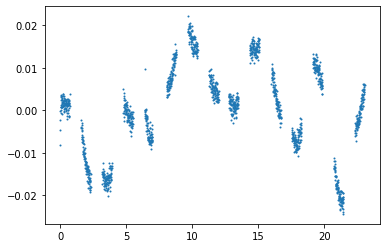

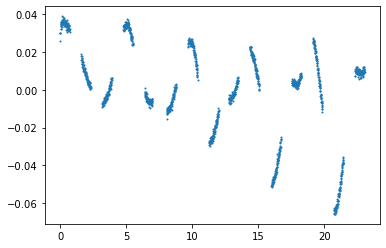

In [35]:
import numpy as np

with open(join(homedir, 'L16B_JBand_LC_.npy'), 'rb') as fin:
    timesB = np.load(fin)
    # LC_erg_s_cm2 
    fluxB= np.load(fin)

with open(join(homedir, 'L16A_JBand_LC_.npy'), 'rb') as fin:
    timesA = np.load(fin)
    # LC_erg_s_cm2 
    fluxA= np.load(fin)

timeHr = (timesA - timesA[0]) * 24
print(np.sum(np.isnan(fluxA)), np.sum(np.isnan(fluxB)))
print(timesA.shape, fluxA.shape, timesB.shape, fluxB.shape)

# normalization
fluxA = (fluxA - fluxA.mean())/fluxA.max()
fluxB = (fluxB - fluxB.mean())/fluxB.max()

luh16 = pd.DataFrame({'time':timeHr, 'fluxA':fluxA, 'fluxB':fluxB})
luh16 = luh16.sort_values(by='time')
timeHr = luh16['time'].values
fluxA = luh16['fluxA'].values
fluxB = luh16['fluxB'].values

plt.close()
plt.figure(), plt.plot(timeHr, fluxA, ls='', marker = '.', ms=2)
plt.figure(), plt.plot(timeHr, fluxB, ls='', marker = '.', ms=2)

In [5]:
### PERIODOGRAMS

frequen = np.linspace(0.003,10.,100000)

# Compute the GLS periodogram with default options.
# Choose Zechmeister-Kuerster normalization explicitly
clp = pyPeriod.Gls((timeHr, fluxB, 0.02*fluxB), norm="ZK", freq=frequen,ofac=10)

Generalized LS - statistical output
-----------------------------------
Number of input points:      1482  
Weighted mean of dataset:    0.000000
Weighted rms of dataset:     0.000014
Time base:                   23.030551
Number of frequency points:  100000

Maximum power p [ZK]:  0.082782
RMS of residuals:      0.000013
  Mean weighted internal error:  0.000000
Best sine frequency:   0.314710 +/-  0.000737
Best sine period:      3.177533 +/-  0.007446
Amplitude:             0.002537 +/-  0.000000
Phase (ph):           -0.199160 +/-  0.000030
Phase (T0):            0.632838 +/-  0.000096
Offset:                0.000516 +/-  0.000000
-----------------------------------


Text(0.5, 1.0, 'Periodogram')

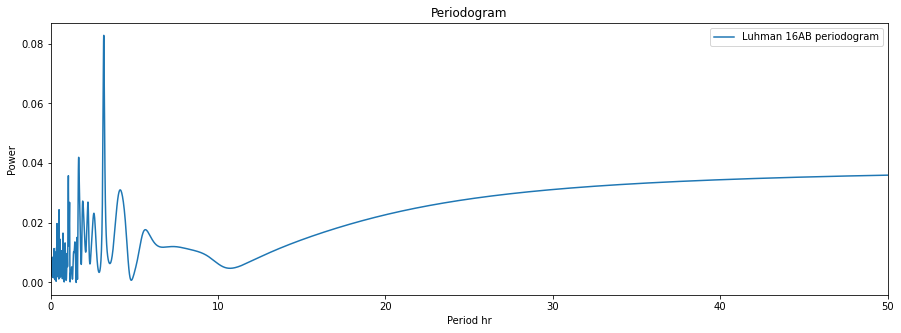

In [12]:
freq = clp.freq
power = clp.power
periods = 1./freq

# Print helpful information to screen
clp.info()

# Define FAP levels (fraction)
fapLevels = 0.1
# Obtain the associated power thresholds
plevels = clp.powerLevel(fapLevels)

#======================================= [1/2]
## Plot the periodogram: Luhman 16 B
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(periods, power, '-', label='Luhman 16AB periodogram')
ax.set_ylabel('Power')
ax.set_xlabel('Period hr')
ax.set_xlim(0,50)
ax.legend()
ax.set_title('Periodogram')

In [252]:
def detect_segments(time, gap_cutoff=0.10):  # 0.1 hours = 6 minutes
    """Split time array into continuous segments with gaps < cutoff"""
    time_diff = np.diff(time)
    gap_indices = np.where(time_diff > gap_cutoff)[0] + 1  # +1 shifts to gap starts
    segment_indices = np.split(np.arange(len(time)), gap_indices)
    return segment_indices

def process_segmented_data(time, signal, 
                          window_size='10H', 
                          gap_cutoff=0.10):
    """Process data with gaps using segmented boxcar averaging"""
    # Detect segments based on time gaps
    segment_indices = detect_segments(time, gap_cutoff)
    
    # Initialize trend array
    trend = np.full_like(time, np.nan)

    global_mean = np.nanmean(signal)

    # Process each segment
    for seg_idx in segment_indices:
        seg_time = time[seg_idx]
        seg_signal = signal[seg_idx]
        
        # Create DataFrame with time as index
        df_seg = pd.DataFrame({'signal': seg_signal},
                             index=pd.to_timedelta(seg_time, unit='h'))
        
        # Compute rolling mean with time-based window
        df_seg['trend'] = df_seg['signal'].rolling(
            window=window_size, 
            min_periods=1,  # Adjust based on your needs
            center=True
        ).mean()
        
        # Store results
        trend[seg_idx] = df_seg['trend'].values 
    
    # Create full DataFrame with original time index
    df_full = pd.DataFrame({'signal': signal},
                          index=pd.to_timedelta(time, unit='h'))
    df_full['trend'] = trend

    # Interpolate trend across gaps (time-aware)
    df_full['trend'] = df_full['trend'].interpolate(method='time')

    # first fit
    x_flat = x.flatten()
    y = df_full['signal'].values
    coeffs = np.polyfit(x_flat, y, deg=1)
    p = np.poly1d(coeffs)
    fit = p(x_flat)

    # # second fit
    y2 = (df_full['signal'] - fit)
    coeffs2 = np.polyfit(x_flat, y2.values, deg=3)
    p2 = np.poly1d(coeffs2)
    fit2 = p2(x_flat)

    # Calculate short-term component
    df_full['short'] = df_full['signal'] - fit # return first-degree fit
    # df_full['short'] = y2 - fit2 # return second-degree fit
    
    return df_full

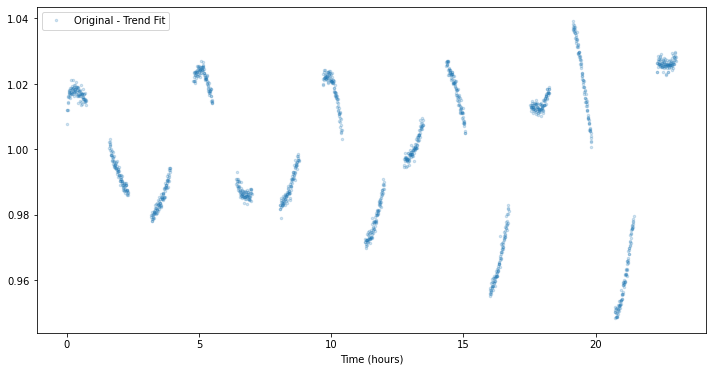

In [263]:
# Process data
processed_df = process_segmented_data(
    time=timeHr,
    signal=fluxB,
    window_size='10H',
    gap_cutoff=0.1 # hours (beyond cutoff, a new segment starts)
)

# Extract results
og = processed_df['signal']
trend = processed_df['trend'].values
short_term = 1+processed_df['short'].values

plt.figure(figsize=(12, 6))

plt.plot(time, short_term, label='Original - Trend Fit',
         ls='', marker='.', ms=5, alpha=0.2)

plt.xlabel('Time (hours)')
plt.legend()

save = True
# save = False

if save: 
    pathSave = join(homedir, 'L16B_JBand_shortTermLC.npy')
    np.save(pathSave, np.array((time, short_term)))

In [264]:
def sixsines(time, a1, p1, a2, p2, a3, p3, a4, p4, a5, p5, a6, p6, offset):
    periods = np.array([4.58, 4.68, 4.98, 5.21, 5.26, 5.34])
    om = 2*pi/periods
    
    sine1 = a1 * np.sin(om[0]*time + p1)
    sine2 = a2 * np.sin(om[1]*time + p2)
    sine3 = a3 * np.sin(om[2]*time + p3)
    sine4 = a4 * np.sin(om[3]*time + p4)
    sine5 = a5 * np.sin(om[4]*time + p5)
    sine6 = a6 * np.sin(om[5]*time + p6)
    fit = sine1 + sine2 + sine3 + sine4 + sine5 + sine6 + offset
    
    if not residual: 
        return fit
    else:
        res = np.sum( ((data-fit)/0.003)**2 )
        return (fit, res)

def threesines (time, a1, p1, a2, p2, a3, p3, offset):
    periods = np.array([4.68, 4.98, 5.26])
    om = 2*pi/periods
    
    sine1 = a1 * np.sin(om[0]*time + p1)
    sine2 = a2 * np.sin(om[1]*time + p2)
    sine3 = a3 * np.sin(om[2]*time + p3)
    fit = sine1 + sine2 + sine3
    
    return fit

# hyperOPT Decision Tree

In [260]:
import sys
import tarfile

# Monkey-patch backports.tarfile to use the standard tarfile module
sys.modules['backports.tarfile'] = tarfile

import sklearn 
from sklearn.metrics import mean_squared_error, r2_score
from hyperopt import hp, tpe, Trials, fmin
# import time
pi = np.pi

In [299]:
# choose time subset
tlow, thigh = time[0], time[-1]
subset = short_term

periods3 = np.array([5.0, 5.0, 2.5, 40])
om3 = 2*pi/periods3
w1, w2, w3, w4 = om3[0], om3[1], om3[2], om3[3]  # default values
print(w1, w2, w3, w4)
# print(0.3*w1, 0.3*w2, 0.3*w3)

# known_freq = True # prescribe 3 known freq
known_freq = False # guess freq from fit

if known_freq:
    w1, w2, w3, w4

1.2566370614359172 1.2566370614359172 2.5132741228718345 0.15707963267948966


In [330]:
# random split the data into train and test
x_data = time
y_data = short_term

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=42)

if known_freq:
    def objective(a0, a1, f1, a2, f2, a3, f3):
        """Objective function to minimize"""
        w1, w2, w3 = om3[0], om3[1], om3[2]
        return np.mean((a0+ a1 * np.sin(w1*X_train + f1) + a2 * np.sin(w2*X_train + f2) + a3 * np.sin(w3*X_train + f3) - y_train)**2)
    
    def objective2(args):
        return objective(*args)
else:
    #### FOUR SINES WITH TIME SLOPE: amplitude increasing over time
    def objective(a0, a1, f1, a2, f2, a3, f3, a4, f4, w1, w2, w3, w4, dt):
        """Objective function to minimize"""
        return np.mean((a0
                        + a1*(1+dt) * np.sin(w1*(X_train) + f1) 
                        + a2*(1+dt) * np.sin(w2*(X_train) + f2) 
                        + a3*(1+dt) * np.sin(w3*(X_train) + f3)
                        + a4*(1+dt) * np.sin(w4*(X_train) + f4)- y_train)**2)

    def objective2(args):
        return objective(*args) 

seed = 12345512
np.random.seed(seed)

In [331]:
from hyperopt import hp, tpe, Trials, fmin
from IPython.display import display, Math
# objective(a0, a1, f1, a2, f2, a3, f3, a4, f4, w1, w2, w3, w4, dt)
bounds = [[0.99, 1.01],
          [0.005, 0.05],
              [-np.pi, np.pi],
          [0.005, 0.05],
              [-np.pi, np.pi],
          [0.005, 0.05],
              [-np.pi, np.pi],
          [0.005, 0.05],
              [-np.pi, np.pi],
          [2.35, 2.5],
          [2.50, 2.65],
          [1.10, 1.25],
          [1.30, 1.40],
          [0, 0.01]]

if known_freq:
    space = [hp.uniform('a0', bounds[0][0], bounds[0][1]),
             hp.uniform('a1', bounds[1][0], bounds[1][1]), 
             hp.uniform('f1', bounds[2][0], bounds[2][1]),
             hp.uniform('a2', bounds[3][0], bounds[3][1]), 
             hp.uniform('f2', bounds[4][0], bounds[4][1]),
             hp.uniform('a3', bounds[5][0], bounds[5][1]), 
             hp.uniform('f3', bounds[6][0], bounds[6][1])]
else:
    space = [hp.uniform('a0', bounds[0][0], bounds[0][1]),
             hp.uniform('a1', bounds[1][0], bounds[1][1]), 
             hp.uniform('f1', bounds[2][0], bounds[2][1]),
             hp.uniform('a2', bounds[3][0], bounds[3][1]), 
             hp.uniform('f2', bounds[4][0], bounds[4][1]),
             hp.uniform('a3', bounds[5][0], bounds[5][1]), 
             hp.uniform('f3', bounds[6][0], bounds[6][1]),
             hp.uniform('a4', bounds[7][0], bounds[7][1]), 
             hp.uniform('f4', bounds[8][0], bounds[8][1]),
             hp.uniform('w1', bounds[9][0], bounds[9][1]),
             hp.uniform('w2', bounds[10][0], bounds[10][1]),
             hp.uniform('w3', bounds[11][0], bounds[11][1]),
             hp.uniform('w4', bounds[12][0], bounds[12][1]),
             hp.uniform('dt', bounds[13][0], bounds[13][1])]

In [332]:
tpe_algo = tpe.suggest
tpe_trials = Trials()

tpe_best = fmin(fn=objective2, space=space, algo=tpe_algo, trials=tpe_trials, max_evals=2000, rstate=np.random.default_rng(seed))

if known_freq:
    print('Prescribed frequency')
    display(Math('\\omega_1={:.2f}, \\omega_2={:.2f}, \\omega_3={:.2f}, \\omega_4={:.2f}, \\omega_5={:.2f}'.format(*[w1, w2, w3, w4, w5])))

    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}'.format(**tpe_best)))
    
else:
    print('Fitted parameters:')   
    #### FOUR SINES WITH TIME SHIFT
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f},\
    a_3={a3:.2e}, \\phi_3={f3:.2f}, a_4={a4:.2e}, \\phi_4={f4:.2f},\
    \\omega_1={w1:.2f}, \\omega_2={w2:.2f}, \\omega_3={w3:.2f}, \\omega_4={w4:.2f}, dt={dt:.2f}'.format(**tpe_best)))
    
    tpe_best

  0%|          | 0/2000 [00:00<?, ?trial/s, best loss=?]

100%|██████████| 2000/2000 [01:13<00:00, 27.08trial/s, best loss: 2.427063912448293e-05] 
Fitted parameters:


<IPython.core.display.Math object>

mse: 2.353781250657061e-05
r2: 0.9483234072595763


<IPython.core.display.Math object>

2.514, 2.432, 5.028, 4.786
2.500, 2.583, 1.250, 1.313
{'a0': 0.9992914982774904, 'a1': 0.011431275393686572, 'a2': 0.005683440823961902, 'a3': 0.03009069847155836, 'a4': 0.04867567341014166, 'dt': 0.006002769924100511, 'f1': 3.141165291452722, 'f2': 0.20167019888175775, 'f3': -1.1189355641275698, 'f4': 1.5284395474341577, 'w1': 2.4997724342280914, 'w2': 2.5831336473320565, 'w3': 1.2496406620621587, 'w4': 1.3129488231512847}


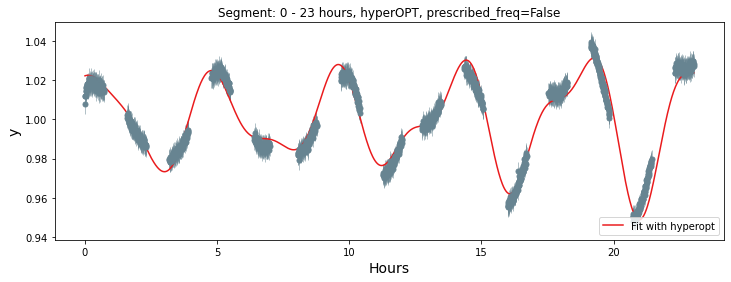

In [334]:
# Test
from sklearn.metrics import mean_squared_error, r2_score

x_data = time
x_plot = np.linspace(tlow, thigh, 1000)  # for smooth plotting
y_data = short_term
y_errors = 0.005*short_term
elc = y_errors  # error in the light curve, assuming 1% relative error
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=42)

if known_freq:
    ypred = tpe_best['a0']+ tpe_best['a1'] * np.sin(w1 * X_test + tpe_best['f1']) +tpe_best['a2'] * np.sin(w2 * X_test + tpe_best['f2']) +tpe_best['a3'] * np.sin(w3 * X_test + tpe_best['f3'])
    y = tpe_best['a0'] + tpe_best['a1'] * np.sin(w1* x_plot + tpe_best['f1']) + tpe_best['a2'] * np.sin(w2 * x_plot + tpe_best['f2']) + tpe_best['a3'] * np.sin(w3 * x_plot + tpe_best['f3'])
else:
    a1x, a2x, a3x, a4x = 1, 1, 1, 1
    ypred = [tpe_best['a0'] + a1x*tpe_best['a1'] * (1+tpe_best['dt']) * np.sin(tpe_best['w1'] * (X_test) + tpe_best['f1'])
                            + a2x*tpe_best['a2'] * (1+tpe_best['dt']) *  np.sin(tpe_best['w2'] * (X_test) + tpe_best['f2']) 
                            + a3x*tpe_best['a3'] * (1+tpe_best['dt']) * np.sin(tpe_best['w3'] * (X_test) + tpe_best['f3'])
                            + a4x*tpe_best['a4'] * (1+tpe_best['dt']) * np.sin(tpe_best['w4'] * (X_test) + tpe_best['f4'])][0]
                
    y =  [tpe_best['a0'] + a1x*tpe_best['a1'] * (1+tpe_best['dt']) * np.sin(tpe_best['w1'] * (x_plot) + tpe_best['f1'])
                         + a2x*tpe_best['a2'] * (1+tpe_best['dt']) *  np.sin(tpe_best['w2'] * (x_plot) + tpe_best['f2']) 
                         + a3x*tpe_best['a3'] * (1+tpe_best['dt']) * np.sin(tpe_best['w3'] * (x_plot) + tpe_best['f3'])
                         + a4x*tpe_best['a4'] * (1+tpe_best['dt']) * np.sin(tpe_best['w4'] * (x_plot) + tpe_best['f4'])][0]
    
rmse = mean_squared_error(y_test,ypred)
r2 = r2_score(y_test,ypred)
print('mse:', rmse)
print('r2:',r2)

fig, ax = plt.subplots(figsize=(12,4))
ax.errorbar(x_data, y_data, yerr=elc, elinewidth=0.5, color= '#678491', ls='', marker='o', ms=5)
ax.plot(x_plot, y, label= 'Fit with hyperopt', color='#EA1B1D')
# plt.ylim((0.9, 1.1))
ax.set_ylabel('y', fontsize= 14)
ax.set_xlabel('Hours', fontsize= 14)
plt.legend(loc='lower right')
plt.title('Segment: %i - %i hours, hyperOPT, prescribed_freq=%s'%(tlow, thigh, known_freq))

if known_freq:
    print('Prescribed frequency')
    display(Math('\\omega_1={:.2f}, \\omega_2={:.2f}, \\omega_3={:.2f}'.format(*[w1, w2, w3])))

    print('Fitted parameters:')
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f}, a_3={a3:.2e}, \\phi_3={f3:.2f}'.format(**tpe_best)))
else:
    #### FOUR SINES
    w1, w2, w3, w4 = tpe_best['w1'], tpe_best['w2'], tpe_best['w3'], tpe_best['w4']
    display(Math('a_0={a0:.5f}, a_1={a1:.2e}, \\phi_1={f1:.2f}, a_2={a2:.2e}, \\phi_2={f2:.2f},\
    a_3={a3:.2e}, \\phi_3={f3:.2f}, a_4={a4:.2e}, \\phi_4={f4:.2f},\
    \\omega_1={w1:.2f}, \\omega_2={w2:.2f}, \\omega_3={w3:.2f}, \\omega_4={w4:.2f}, dt={dt:.2f}'.format(**tpe_best)))
    
print('%.3f, %.3f, %.3f, %.3f'%(2*pi/w1, 2*pi/w2, 2*pi/w3, 2*pi/w4))
print('%.3f, %.3f, %.3f, %.3f'%(w1, w2, w3, w4))
print(tpe_best)

In [ ]:
#### Write the light curve metadata to be used in subsequent MCMC steps.

# write = True
write = False

if write:
    fitinfo = tpe_best.copy()
    for i, key in enumerate(tpe_best):
        val = fitinfo[key]
        list = [val]
        list.append(bounds[i])
        fitinfo[key] = list
    fitinfo['hr'] = tlow, thigh
    fitinfo['known_freq'] = known_freq

    handle_code = 'hyperOPT'
    fitinfo['code'] = handle_code
    if known_freq: handle_case = 'limFreq'
    else: handle_case = 'freeFreq'

    folder = join(homedir,'lightCurveFit_metadata')
    filename = '%s_%i_%i-hr_%s_fitMeta.pkl'%(handle_code, tlow, thigh, handle_case)

    import pickle

    with open(join(folder, filename), 'wb') as file:
        pickle.dump(fitinfo, file, protocol=pickle.HIGHEST_PROTOCOL)

    with open(join(folder, filename), 'rb') as file:
        b = pickle.load(file)
    print(b == fitinfo)
    b

True
